# Histogram Analysis
## Inter-Arrival Times and Service Times with best fit distributions

**Imports**

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats as st
import read_data as rd

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Serif"]})

plt.rcParams.update({'font.size': 14})
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')


**Read Data**

In [6]:
import os
from pathlib import Path

filenames = [str(Path(os.path.abspath('')).parent) + "\Data Collection\KevinYeData.txt",
            str(Path(os.path.abspath('')).parent) + "\Data Collection\dataviviandong.txt",
            str(Path(os.path.abspath('')).parent) + "\Data Collection\PatrickQData.txt",
            str(Path(os.path.abspath('')).parent) + "\Data Collection\TamaHoareData.txt"]
results = rd.ReadData(filenames=filenames)
AllArrivals = results[0]
AllServices = results[1]

**Methods**

In [7]:
#DETERMINING BINS FOR HISTOGRAM
def bin(m):
    q25, q75 = np.percentile(m, [25, 75])
    bin_width = 2 * (q75 - q25) * len(m) ** (-1/3)
    bins = round((max(m) - min(m)) / bin_width)
    return bins

## Results

**Data and Frequencies**

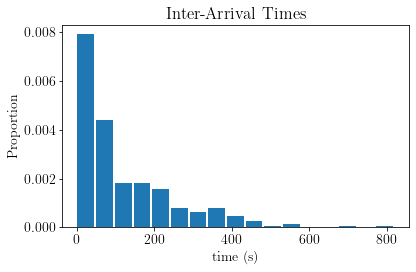

In [8]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Serif"]})

fig, ax = plt.subplots(tight_layout=True)
ax.hist(AllArrivals, density = True, bins = bin(AllArrivals), rwidth = 0.9)
mn, mx = ax.set_xlim()
ax.set_xlim(mn, mx)
ax.set_ylabel(r"\textnormal{Proportion}")
ax.set_xlabel(r'\textnormal{time (s)}')
ax.set_title(r'\textnormal{Inter-Arrival Times}')

plt.savefig("fig1.pdf", format="pdf", bbox_inches="tight")
plt.show()

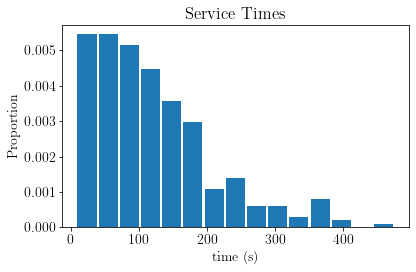

In [9]:
fig, ax = plt.subplots(tight_layout=True)
ax.hist(AllServices, density = True, bins = bin(AllServices), rwidth = 0.9)
mn, mx = ax.set_xlim()
ax.set_xlim(mn, mx)
ax.set_ylabel(r"\textnormal{Proportion}")
ax.set_xlabel(r'\textnormal{time (s)}')
ax.set_title(r'\textnormal{Service Times}')

plt.savefig("fig2.pdf", format="pdf", bbox_inches="tight")
plt.show()

**With Betterment of fit**

From our analysis, it suggests that Pearson3 is the best in approximating ‘inter-arrival time’ Data. This analysis is shown below:

PDF parameters are: 2.43659632424228 89.15123787553043 108.61278925458328


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


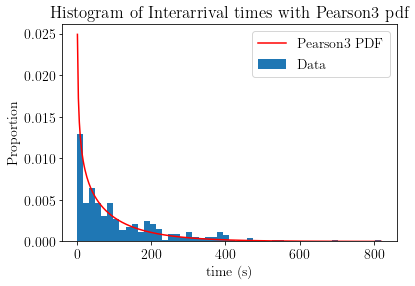

In [10]:
##Inter-Arrivals
fig, ax = plt.subplots(1, 1)
ap, bp, cp = st.pearson3.fit(AllArrivals)

x = np.linspace(st.pearson3.ppf(0.05, ap, bp, cp),
                st.pearson3.ppf(0.9992, ap, bp, cp), len(AllArrivals))

ax.plot(x, st.pearson3.pdf(x, ap,bp,cp),
       'r-', label=r'\textnormal{Pearson3 PDF}')

ax.hist(AllArrivals, density=True, histtype='stepfilled',bins=50, label = r"\textnormal{Data}")

#Plot Best Fit Distribution
ax.set_ylabel(r"\textnormal{Proportion}")
ax.set_xlabel(r'\textnormal{time (s)}')
ax.set_title(r'\textnormal{Histogram of Interarrival times with Pearson3 pdf}')
ax.legend()

print("PDF parameters are:", ap, bp, cp)

plt.savefig("fig3.pdf", format="pdf", bbox_inches="tight")
plt.show()

For our 'service times' data, it suggests that beta distribution is the best fit for the data. This analysis is shown below:

c:\Users\PDPDK\Anaconda\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


PDF parameters are: 1.4923327932636143 15.801670930407775 7.642594962182772


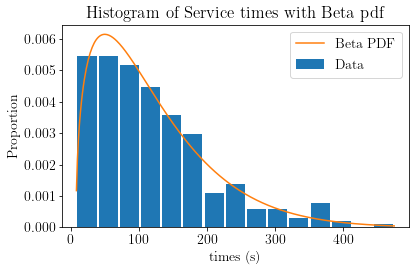

In [11]:
#Service Times
#plot Histogram
fig, ax = plt.subplots(tight_layout=True)
ax.hist(AllServices, density = True, bins = bin(AllServices), rwidth = 0.9,label = r"\textnormal{Data}")
mn, mx = ax.set_xlim()
ax.set_xlim(mn, mx)
##Plot Best Fit Distribution
Sermin, Sermax = min(AllServices), max(AllServices)  

lnspcSer = np.linspace(Sermin, Sermax, len(AllServices))#For Services

ab,bb,cb,db = st.beta.fit(AllServices)  #Fitting
pdf_beta = st.beta.pdf(lnspcSer, ab, bb,cb, db)  

ax.plot(lnspcSer, pdf_beta, label=r"\textnormal{Beta PDF}")


ax.set_title(r"\textnormal{Histogram of Service times with Beta pdf}")
ax.set_xlabel(r"\textnormal{times (s)}")
ax.set_ylabel(r"\textnormal{Proportion}")
ax.legend()

print("PDF parameters are:", ab, bb, cb)

plt.savefig("fig4.pdf", format="pdf", bbox_inches="tight")
plt.show()

**Comparing**


Upon putting the best fit distributions onto the original histogram data, we can see how good of a fit they are. Both the Beta and Pearson3 distribution are well distributed along the data

*Disclamer: There appears to be a RuntimeWarning on the Beta plot. Although, it seems to be working well and the PDF is well distributed along the data.*